<a href="https://colab.research.google.com/github/Pree-om/deep-learning/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VGG16**

In [2]:
#visit tensorSpace.js for visualization
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from keras.utils import to_categorical

(train_ds,train_labels),(test_ds,test_labels) =tfds.load("tf_flowers",
                                                       split=["train[:70%]","train[:30%]",],batch_size=-1,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.L9V4YT_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [3]:
train_ds[0].shape

TensorShape([442, 1024, 3])

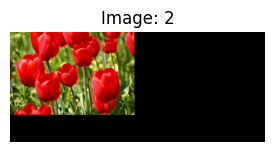

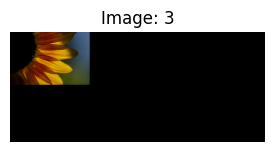

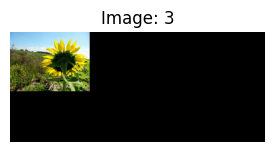

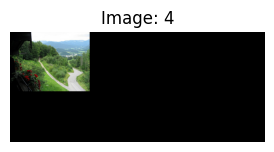

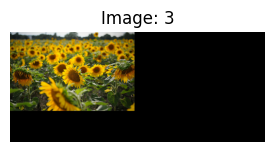

In [4]:
for i in range(5):
  plt.figure(figsize=(10,10))
  plt.subplot(5,1,i+1)
  plt.imshow(train_ds[i])
  plt.title(f'Image: {train_labels[i]}')
  plt.subplots_adjust(hspace=0.5)
  plt.axis("off")

In [5]:
#resizing images
train_ds = tf.image.resize(train_ds,(150,150))
test_ds = tf.image.resize(test_ds,(150,150))
#Transforming labels to correct format
train_labels = to_categorical(train_labels,num_classes=5)
test_labels = to_categorical(test_labels,num_classes=5)

print(test_labels[0])
print(test_labels[1])
print(test_labels[2])

tf.Tensor([0. 0. 1. 0. 0.], shape=(5,), dtype=float32)
tf.Tensor([0. 0. 0. 1. 0.], shape=(5,), dtype=float32)
tf.Tensor([0. 0. 0. 1. 0.], shape=(5,), dtype=float32)


In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

#loading VGG16 model
base_model = VGG16(weights="imagenet",include_top=False,input_shape=train_ds[0].shape)
base_model.trainable = False
base_model.summary()

#prepocessing input
train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
from tensorflow.keras import layers,models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50,activation="relu")
dense_layer_2 = layers.Dense(20,activation="relu")
prediction_layer = layers.Dense(5,activation="softmax")

model = models.Sequential([
  base_model,
  flatten_layer,
  dense_layer_1,
  dense_layer_2,
  prediction_layer
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │         409,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             105 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,125,463 (57.70 MB)

 Trainable params: 410,775 (1.57 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(train_ds,train_labels,epochs=20,validation_split=0.2)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 26s 228ms/step - accuracy: 0.4402 - loss: 3.9200 - val_accuracy: 0.6595 - val_loss: 1.0386
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 26s 133ms/step - accuracy: 0.7853 - loss: 0.6189 - val_accuracy: 0.6693 - val_loss: 0.9847
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.8731 - loss: 0.3794 - val_accuracy: 0.7004 - val_loss: 0.9187
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9149 - loss: 0.2562 - val_accuracy: 0.7004 - val_loss: 0.9685
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.9397 - loss: 0.1933 - val_accuracy: 0.7140 - val_loss: 1.0435
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9681 - loss: 0.1277 - val_accuracy: 0.6984 - val_loss: 1.1543
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.9770 - loss: 0.0969 - val_accuracy: 0.6926 - val_loss: 1.1215
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - accuracy: 0.9786 - loss: 0.0708 - val_accuracy

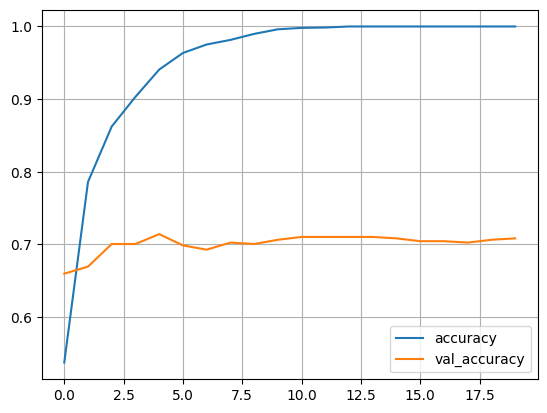

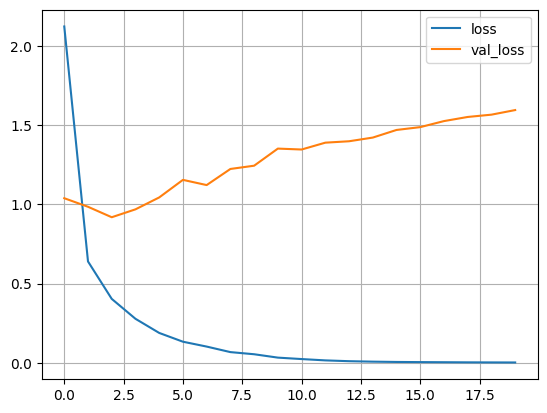

In [9]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.grid()
plt.show()

In [10]:
loss_acc=model.evaluate(test_ds,test_labels)
print("Loss: ",loss_acc[0])
print("Accuracy: ",loss_acc[1])

35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 202ms/step - accuracy: 1.0000 - loss: 0.0029
Loss:  0.0024524445179849863
Accuracy:  1.0
